# PISA 2012 Project (Communicate Data Findings)

## by Jakub Revay

## Introduction

PISA - Programme for International Student Assessment- has gather an amazing and diverse data from 66 countries around the globe, including OECD and non OECD countries to preform possible studies, like this project were we dive indepth into  the Socio-Economic,Parental School EdUcation and the Wealth stats and their effect on Grades.  
The full 2012 PISA dataset to download [PISA2012](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip 'Download file' ).
additionally,a Dictionary companion was downloaded which describes each column information inthe PISA dataset.
The PISA data dictionary, which gives a brief explaination of each feature [PISADict](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv 'Download File').
the data given is collected in 2012 from students  born in 1996-1997, and the main PISA study was to check: 

- how well students have learned the school curriculum
- how well prepared they are for life beyond school.

thou we are going to study diffrent aspects, its good to know the main purpose of the original Project and its collected data.




#  Table of Contetnt
 1. [Preliminary Wrangling](#gath)<br>
     1.1 [View of Data-Describing Columns](#view)<br>

2. [Univariate Exploration](#uni)<br>
    2.1 [Student count by Country](#cbc)<br>
    2.2 [Overall Grade Score](#ogs)   <br>
    2.3 [Average Grade by Country](#agc) <br>
    2.4 [Socio-Economic Index ](#sei) <br>
    2.5 [Gender  stats](#gs)<br>
    2.6 [OECD Countries Percentile](#ocp) <br>
    2.7 [Gender wealth gap](#gwg)<br>
    2.8 [Univariant observation Summary ](#uos)<br>
    

3. [Bivariate Exploration](#bve)<br> 
    3.1 [Gender count by country](#gcc)<br> 
    3.2 [Wealth vs Grade Regression](#gwr)<br> 
    3.3 [Wealth vs Socio-Economic Regression ](#wser)<br> 
    3.4 [Wealth Socio-Economic Grade Correlation ](#wsegc)<br> 
    3.5 [Grid Matrix](#mat)<br>
      3.5.1 [Parents work status vs Grade](#pwsg)<br> 
      3.5.2 [Parents School Education vs Grade](#pseg)<br> 
      3.5.3 [Parents work stats vs OECD ](#pwso)<br> 
      3.5.4 [Parents Education stats vs OECD](#peso)<br> 
    3.6 [Grade Distribution in OECD/Non OECD Countries ](#gdo)<br> 
    3.7 [Grade Average and Max in OECD/Non OECD](#gamo)<br> 
    3.8 [Full Heatmap Demo](#fhmd)<br> 
    3.9 [ Bivariante Summary](#bs)<br>
    
    
4. [Multivariate Exploration](#me)<br> 
    4.1 [Grades Gaussian Density Per Country ](#ggdpc)<br> 
    4.2 [Wealth vs Grade in OECD/ Non OECD Countries](#wgon)<br> 
    4.3 [Gender wealth gap per Grade](#gwgpg)<br> 
    4.2 [Multivariate Summary](#ms)<br> 


5. [Conclusion](#con)<br>

## Preliminary Wrangling 
<a id="gath"></a>
#### gathering, assessing and cleaning the data 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import chardet

#basic colors used
colors = ['#1DA1F2','#f26e1d']

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#checking file encoding 


#with open('pisa2012.csv', 'rb') as rawdata:
#    result = chardet.detect(rawdata.read(100000))
#result


In [3]:
# reading the pisa2012.cvs file with the appropiate enconding loading to a base dataframe

#Base_df = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1',low_memory=False)

In [4]:
# showing all the data set including all columns
#pd.set_option('display.max_columns', None)
#Base_df.head()

In [5]:
# reading the dictiornary with the appropiate enconding , checking the column names to be used 

df_dict = pd.read_csv('pisadict2012.csv', encoding='ISO-8859-1')
df_dict.head(2)

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...


In [6]:
#Base_df.shape

In [7]:
# picking the related columns from 'pisa2012.csv' , loading it as df
#df = Base_df[['CNT','ST01Q01','ST04Q01','ST15Q01','ST19Q01','WEALTH','ESCS','ST13Q01', 'ST17Q01','OECD']]

# renaming columns to their related info- columns names are in same order as the above code line   
#df.columns = ['country','grade','gender','mother_work','father_work','wealth','economic_social_index','mother_edu', 
#              'father_edu', 'OECD']


In [8]:
#opening the new dataframe
df = pd.read_csv('pisaclean.csv') 

In [9]:
# new dataframe head 
df.head()

,country,grade,gender,mother_work,father_work,wealth,economic_social_index,mother_edu,father_edu,OECD
0,Albania,10,Female,other,part-time,-2.92,NaN,3A,3A,Non-OECD
1,Albania,10,Female,full-time,full-time,0.69,NaN,3A,3A,Non-OECD
2,Albania,9,Female,full-time,full-time,-0.23,NaN,3B,3A,Non-OECD
3,Albania,9,Female,full-time,full-time,-1.17,NaN,3B,3A,Non-OECD
4,Albania,9,Female,part-time,part-time,-1.17,NaN,pre-primary,3B,Non-OECD


In [10]:
#checking numerical values 
df.describe()

,grade,wealth,economic_social_index
count,450709.000000,449173.000000,444866.000000
mean,9.646719,-0.369898,-0.308182
std,0.766269,1.218993,1.122823
min,7.000000,-6.650000,-5.950000
25%,9.000000,-1.070000,-1.030000
50%,10.000000,-0.350000,-0.240000
75%,10.000000,0.420000,0.560000
max,13.000000,3.250000,3.690000


In [11]:
# checking columns and mising values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450709 entries, 0 to 450708
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                450709 non-null  object 
 1   grade                  450709 non-null  int64  
 2   gender                 450709 non-null  object 
 3   mother_work            437563 non-null  object 
 4   father_work            421374 non-null  object 
 5   wealth                 449173 non-null  float64
 6   economic_social_index  444866 non-null  float64
 7   mother_edu             427609 non-null  object 
 8   father_edu             413028 non-null  object 
 9   OECD                   450709 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 34.4+ MB


### Cleaning and Tiding the data 

- re-naming columns 
- removing duplicates 
- droping outliers 

In [12]:
#renaming father work column values to appropriate describtion 

df['father_work'] = df['father_work'].replace({'Working full-time <for pay> ': 'full-time' , 
                                               'Working part-time <for pay>': 'part-time',
                                              'Other (e.g. home duties, retired) ':'other', 
                                               'Not working, but looking for a job':'job-search'})
#renaming mother work column values to appropriate describtion 

df['mother_work'] = df['mother_work'].replace({'Working full-time <for pay> ': 'full-time',
                                                 'Working part-time <for pay>': 'part-time',
                                                  'Other (e.g. home duties, retired) ':'other', 
                                                 'Not working, but looking for a job ':'job-search'})

In [13]:
'''
renaming education level of father, mother to a shorter describtion- 
education level labels viewed and taken from International Standard Classification of Education 1997 
and all levels refer to Highest Schooling. 
https://ec.europa.eu/eurostat/cache/metadata/Annexes/educ_uoe_h_esms_an2.htm

3A-ready for theoretical university,
(3B+3C)as 3B-ready for thechnical/occupation,
primary and secondary levels respectively
pre-primary - didnt complete primary
'''


#changing father related name using replace
df['father_edu'] = df['father_edu'].replace({'<ISCED level 3A> ':'3A', 
                                             '<ISCED level 3B, 3C> ':'3B', 
                                             '<ISCED level 2> ':'secondary',
                                             '<ISCED level 1> ':'primary',
                                             'He did not complete <ISCED level 1> ':'pre-primary'}) 
#changing mother related name using replace
df['mother_edu'] = df['mother_edu'].replace({'<ISCED level 3A> ':'3A', 
                                             '<ISCED level 3B, 3C> ':'3B', 
                                             '<ISCED level 2> ':'secondary',
                                             '<ISCED level 1> ':'primary',
                                             'She did not complete <ISCED level 1> ':'pre-primary'})


In [14]:
# adding up all the US states and united states under 1 name 'USA'
df['country'] = df['country'].replace({'Florida (USA)' : 'USA','Massachusetts (USA)': 'USA' , 'Connecticut (USA)': 'USA',
                                      'United States of America' : 'USA'})

In [15]:
# dropping false grades outliers (many are  96) 
f = df[df.grade > 15]
df = df.drop(f.index[:])


In [16]:
#droping duplicates 
df.drop_duplicates(inplace = True)

In [17]:
# saving the new dataframe as csv  for faster re use with no new index 
df.to_csv('pisaclean.csv', index = False)

In [18]:
# checking cleaned new Dataframe 
df.head(2)

,country,grade,gender,mother_work,father_work,wealth,economic_social_index,mother_edu,father_edu,OECD
0,Albania,10,Female,other,part-time,-2.92,NaN,3A,3A,Non-OECD
1,Albania,10,Female,full-time,full-time,0.69,NaN,3A,3A,Non-OECD


In [19]:
# shape of the new dataframe
df.shape

(450709, 10)

## View on Data - Describing Columns
<a id="view"></a>

The initial PISA2012 file consist of almost 500k rows (students) and 636 columns, each column info was interpreted using the PISA given dictionary.
as we are more intrested in the Socio-Economic,Parental School Education,the Wealth stats and their effect on Grades, 
the following columns were chosen:
(column names already changed from the original data to be more undestandable) 

- country - each country name	
- grade -	the overall grade for each student rated between 1- 12 
- gender -students gender	
- mother_work - mothers employment type ( full- time,part-time,job-search, other) 	
- father_work - fathers employment type ( full- time,part-time,job-search, other) 	
- wealth - wealth index 	
- economic_social_index	 - Economical-Social adn Cultural Index  
- mother_edu mothers School-  education (3A, 3B, Secondary,Primary, pre-Primary)
- father_edu fathers School -education (3A, 3B, Secondary,Primary, pre-Primary)
- OECD - if a country is an O0ECD(Organisation for Economic Co-operation and Development) or a Non-OECD

all these colums are realted and will be neede to our investagation.

the new Data was cleaned from obvious outliers, duplicates, and as statted columns renamed. it have now 450942 rows(students) and the 10 columns




# Univariate Exploration
<a id="uni"></a>
### Visualisation of Single variables 

## Student count by Country
<a id="cbc"></a>
#### lets count and check how the Students are devided between countries 

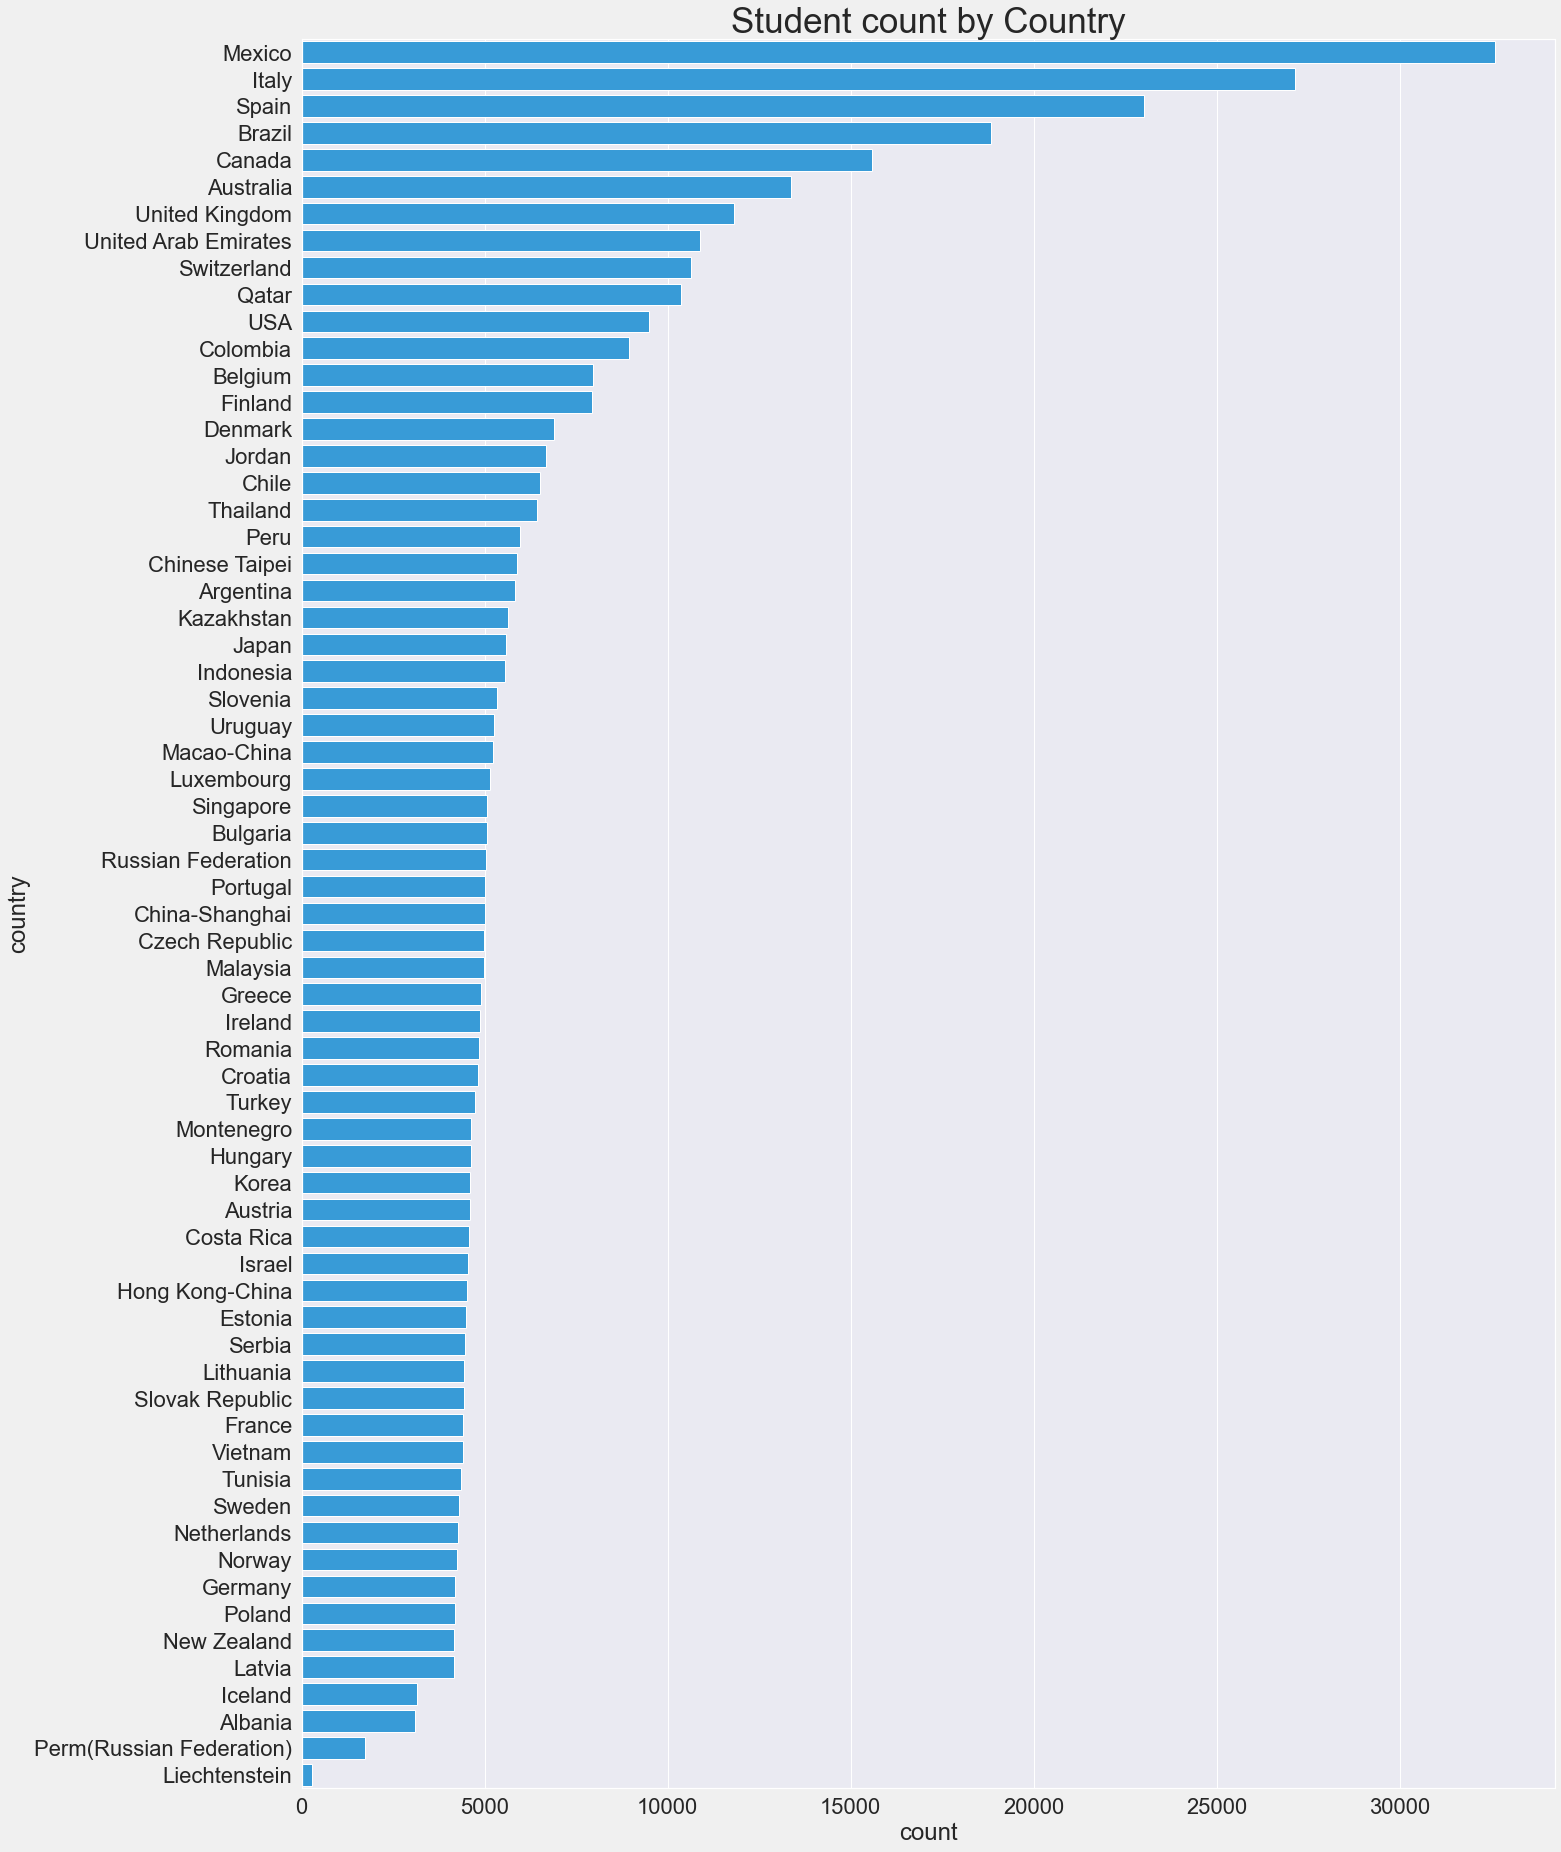

In [20]:
plt.figure(figsize=[20,30])
sb.set(font_scale = 2)

order= df['country'].value_counts().index

sb.countplot(data=df,y='country',order=order, color = '#1DA1F2')
plt.title('Student count by Country',size=35);

#### there is a big diffrence in student count between countries , the survey took a big role in countries like Mexico and Italy  

## Overall Grade Score
<a id="ogs"></a>

#### how are the grade scores devided between the count of Students  

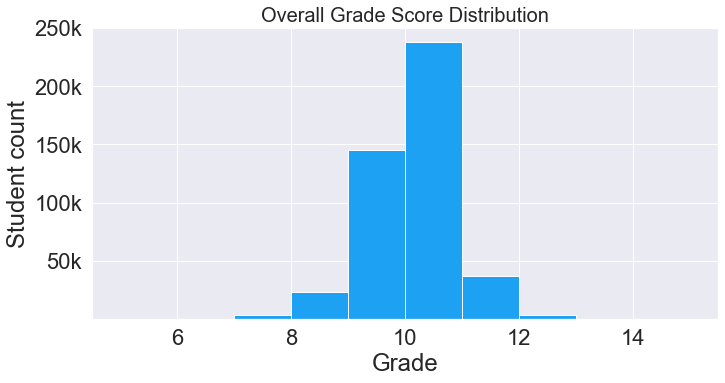

In [21]:
#Overall grade score of students Score
plt.figure(figsize=[10,5])

#plotting the histogram 
bins=np.arange(5,df['grade'].max()+3,1)
ticks = [50000, 100000, 150000, 200000, 250000]
labels = ['50k', '100k','150k', '200k', '250k']

#plotting the histogram 
plt.hist(data= df,x='grade',bins=bins,color= '#1DA1F2')
plt.title('Overall Grade Score Distribution', size=20)
plt.xlabel('Grade')
plt.ylabel('Student count')
plt.yticks(ticks, labels);

**most total  grade scores  falls between 9 -11**

## Average Grade by Country
<a id="agc"></a>
#### which countries are topping the charts in Average Grade Score

(6.0, 14.0)

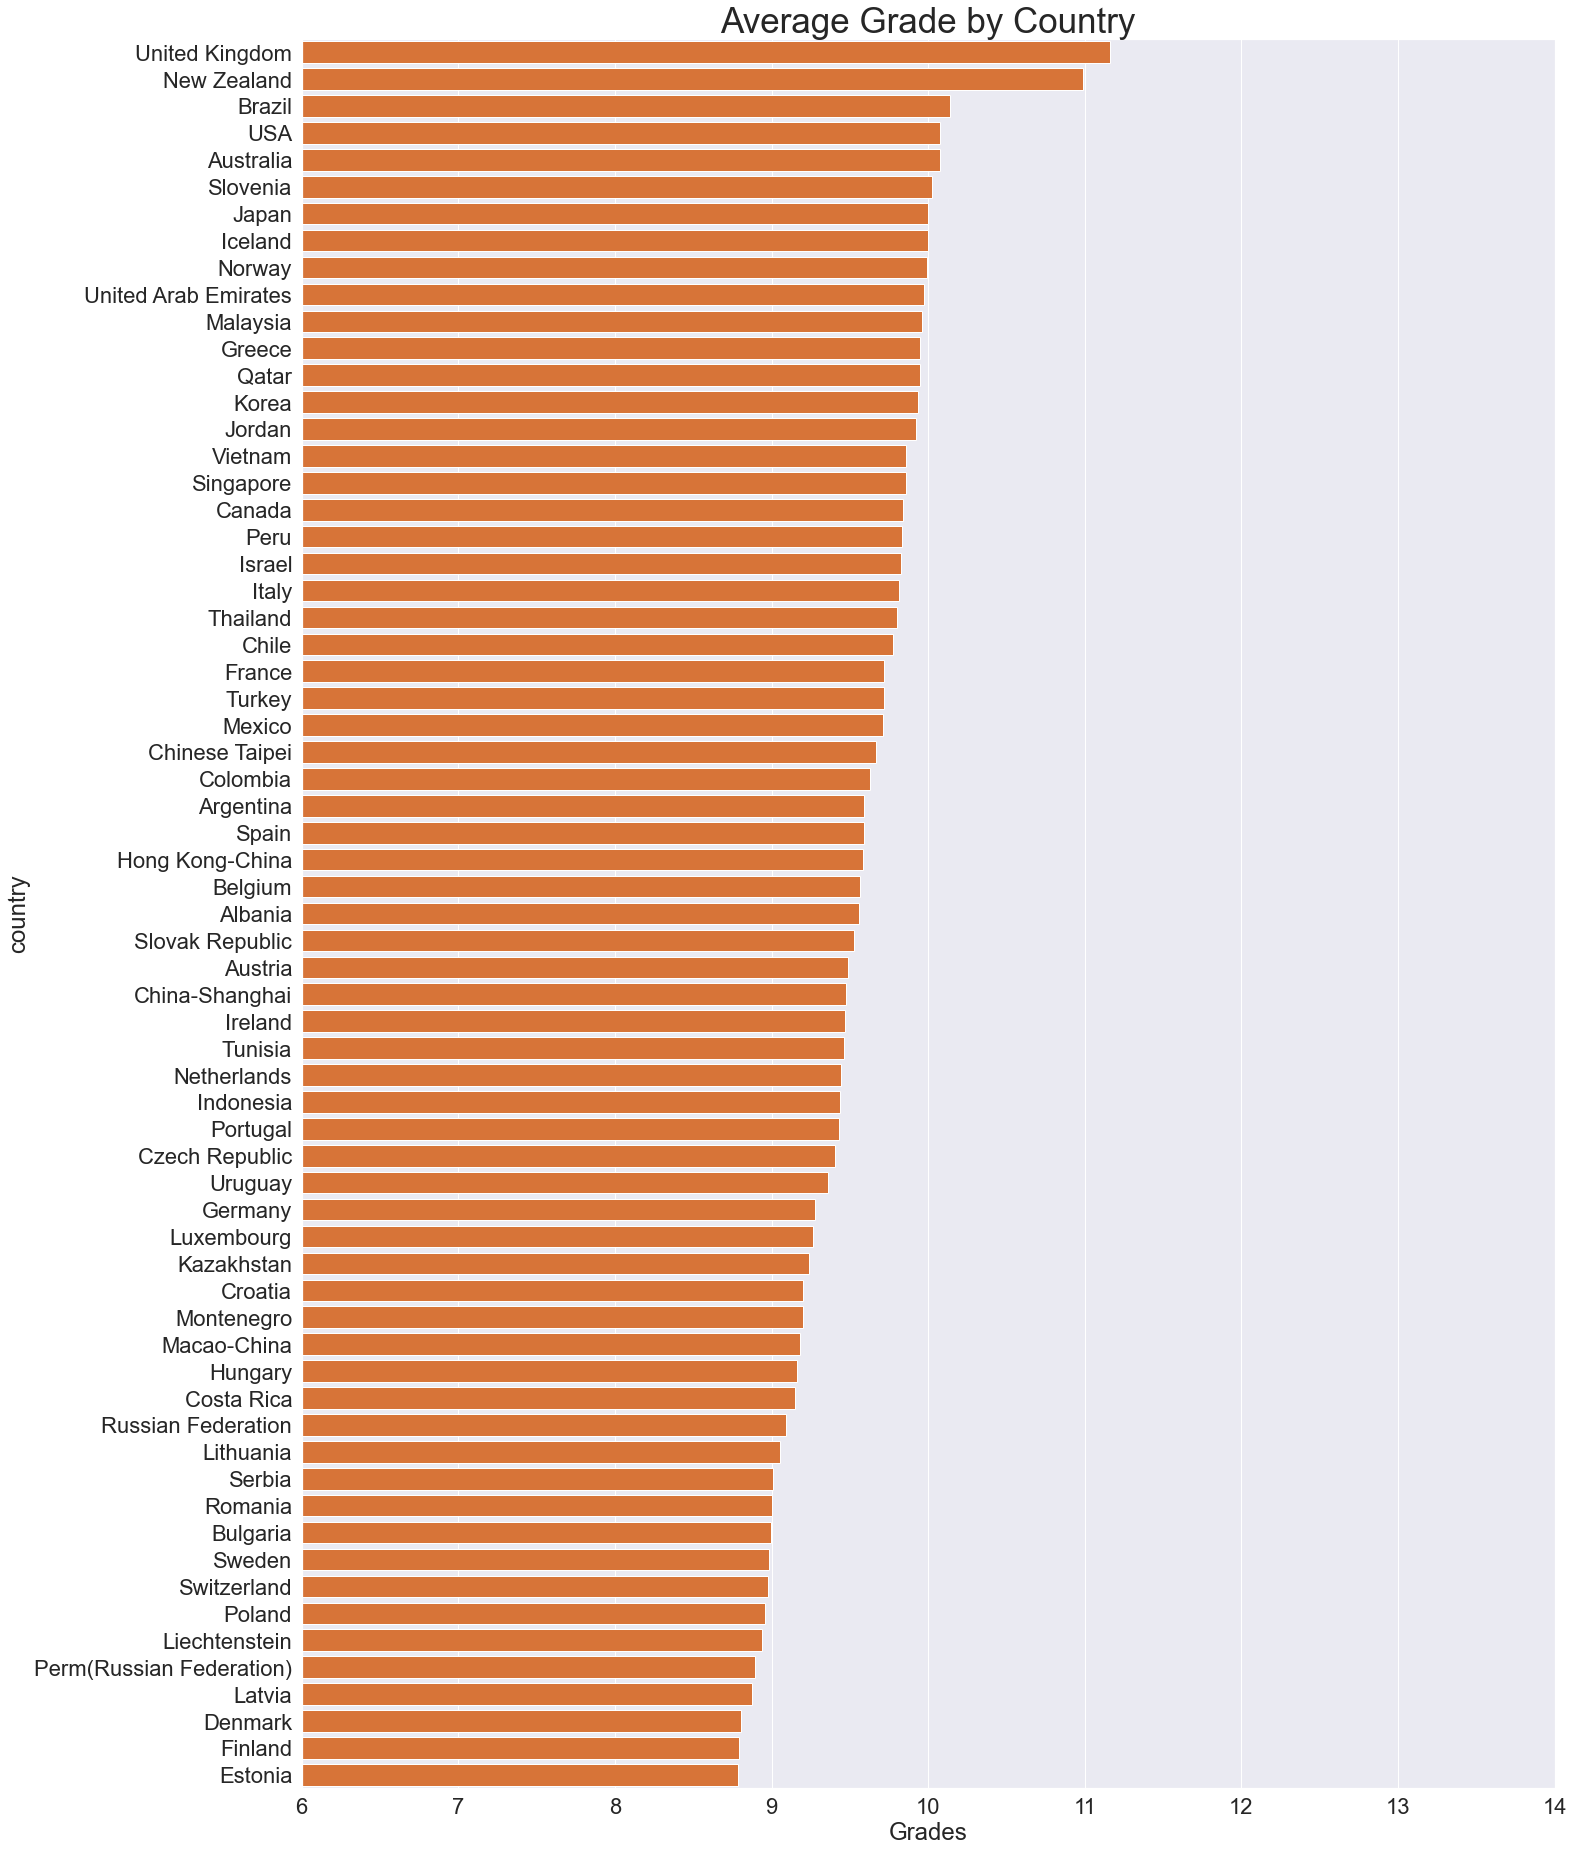

In [22]:
# sorting the countries by average total grade 

grade_mean = (df.groupby('country')['grade'].mean()).sort_values(ascending=False)
plt.figure(figsize=[20,30])
sb.set(font_scale = 2)
sb.barplot( y= grade_mean.index, x = grade_mean.values, color ='#f26e1d')
plt.title('Average Grade by Country', size=35)
plt.xlabel('Grades');
plt.xlim(6,14)

#### there is a slight slope between all countries in grade score, yet the United Kingdom and New Zealand stand out above others! 

## Socio-Economic Index 
<a id="sei"></a>
#### how countried diffear in their socio-economic status, we will start to shape a picture between the plots

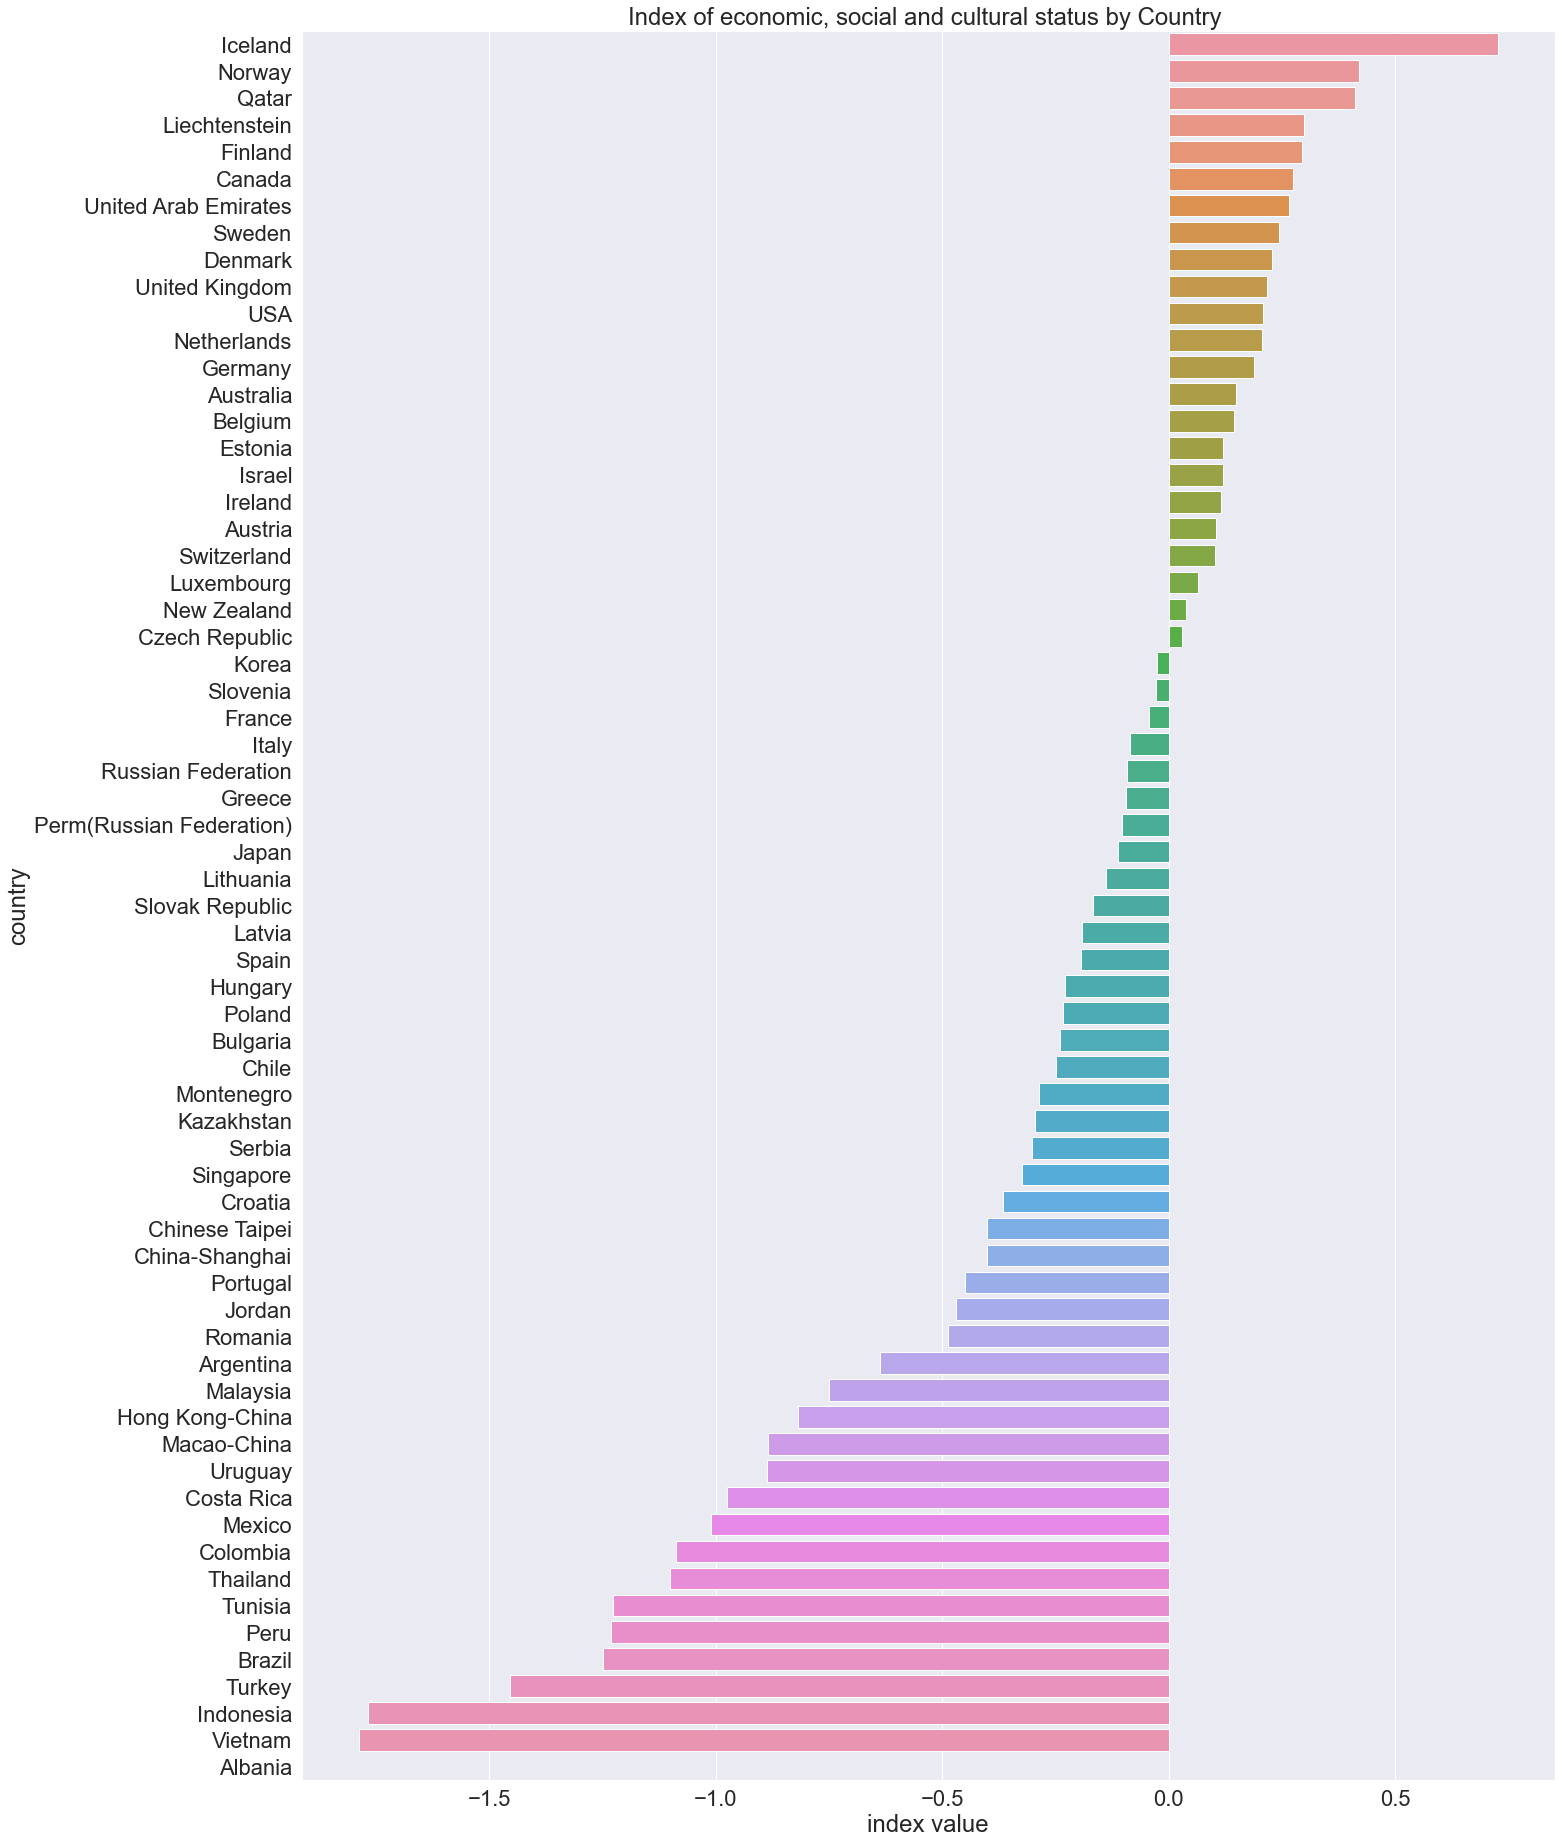

In [23]:
# ploting countries by their economic,social and cultural index value 

economic_index = (df.groupby('country')['economic_social_index'].mean()).sort_values(ascending=False)
plt.figure(figsize=[20,30])
sb.set(font_scale = 2)
sb.barplot( y= economic_index.index, x = economic_index.values);
plt.title('Index of economic, social and cultural status by Country ')
plt.xlabel('index value');

#### countries that topped the average grades aren't in the top socio-economic status countires, seems most countries have a negative socio-economic index score!  Iceland tops the chart with a big diffrence 

## Gender  stats
<a id="gs"></a>

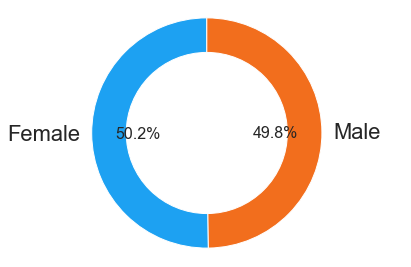

In [24]:
#plotting a dount with gender percentage 

economic_index = (df.groupby('gender')['grade'].mean()).sort_values(ascending=False)
plt.rcParams.update({'font.size': 16})
plt.pie(economic_index.values,  labels= economic_index.index, autopct='%1.1f%%', startangle=90 , colors = colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()


**generally seems there is not a noticable diffrence, both genders are almost equal**

## OECD Countries Percentile 
<a id="ocp"></a>
#### how is the data devided between OECD and Non OECD countries 

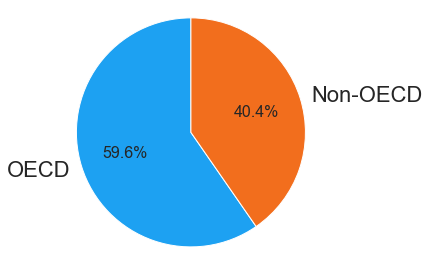

In [25]:
#plotting a pie chart with percentile 
OECD = df.OECD.value_counts()
plt.pie(OECD.values,  labels= OECD.index, autopct='%1.1f%%', startangle=90, colors = colors )
plt.axis('equal')  
plt.tight_layout()

#### almost 60% of the data comes from OECD countries, will be intresting to see these 2 groups effects  

## Gender wealth gap
<a id="gwg"></a>
#### does both genders grow in an equal wealth Households ? 

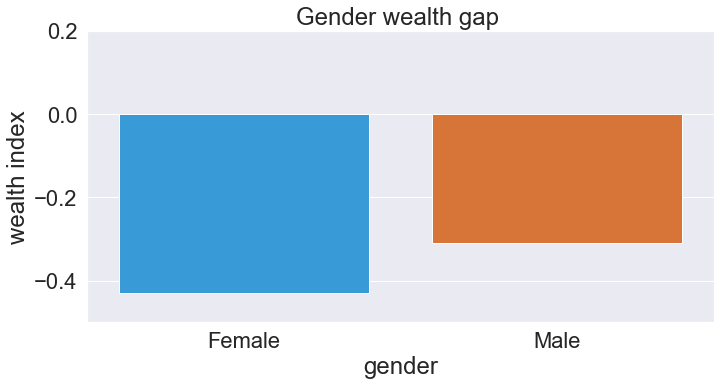

In [26]:
# overall gender wealth gap 

wealth_indx = df.groupby('gender')['wealth'].mean()
plt.figure(figsize=[10,5])
sb.set(font_scale = 2)
sb.barplot( x= wealth_indx.index, y = wealth_indx.values, palette = colors );
plt.ylim(-0.5, 0.2)
plt.title('Gender wealth gap ')
plt.ylabel('wealth index');

#### Males are a bit more fortunate over females in terms of Wealth

## Univariant observation Summary
<a id="uos"></a>

>we start to get a better view on the data and buliding a clearer vision to reach our goal, there are some key points that werent obvious upfront, the gender wealth gap! seems intresting, and it looks that most countries have a negative

# Bivariate Exploration
<a id="bve"></a>
### visualizations of two variates.
lets start adding up on our previous observations. 

## Gender count by country 
<a id="gcc"></a>
#### if wealth is favored to males , how are students gender devided bwetween countires ?  

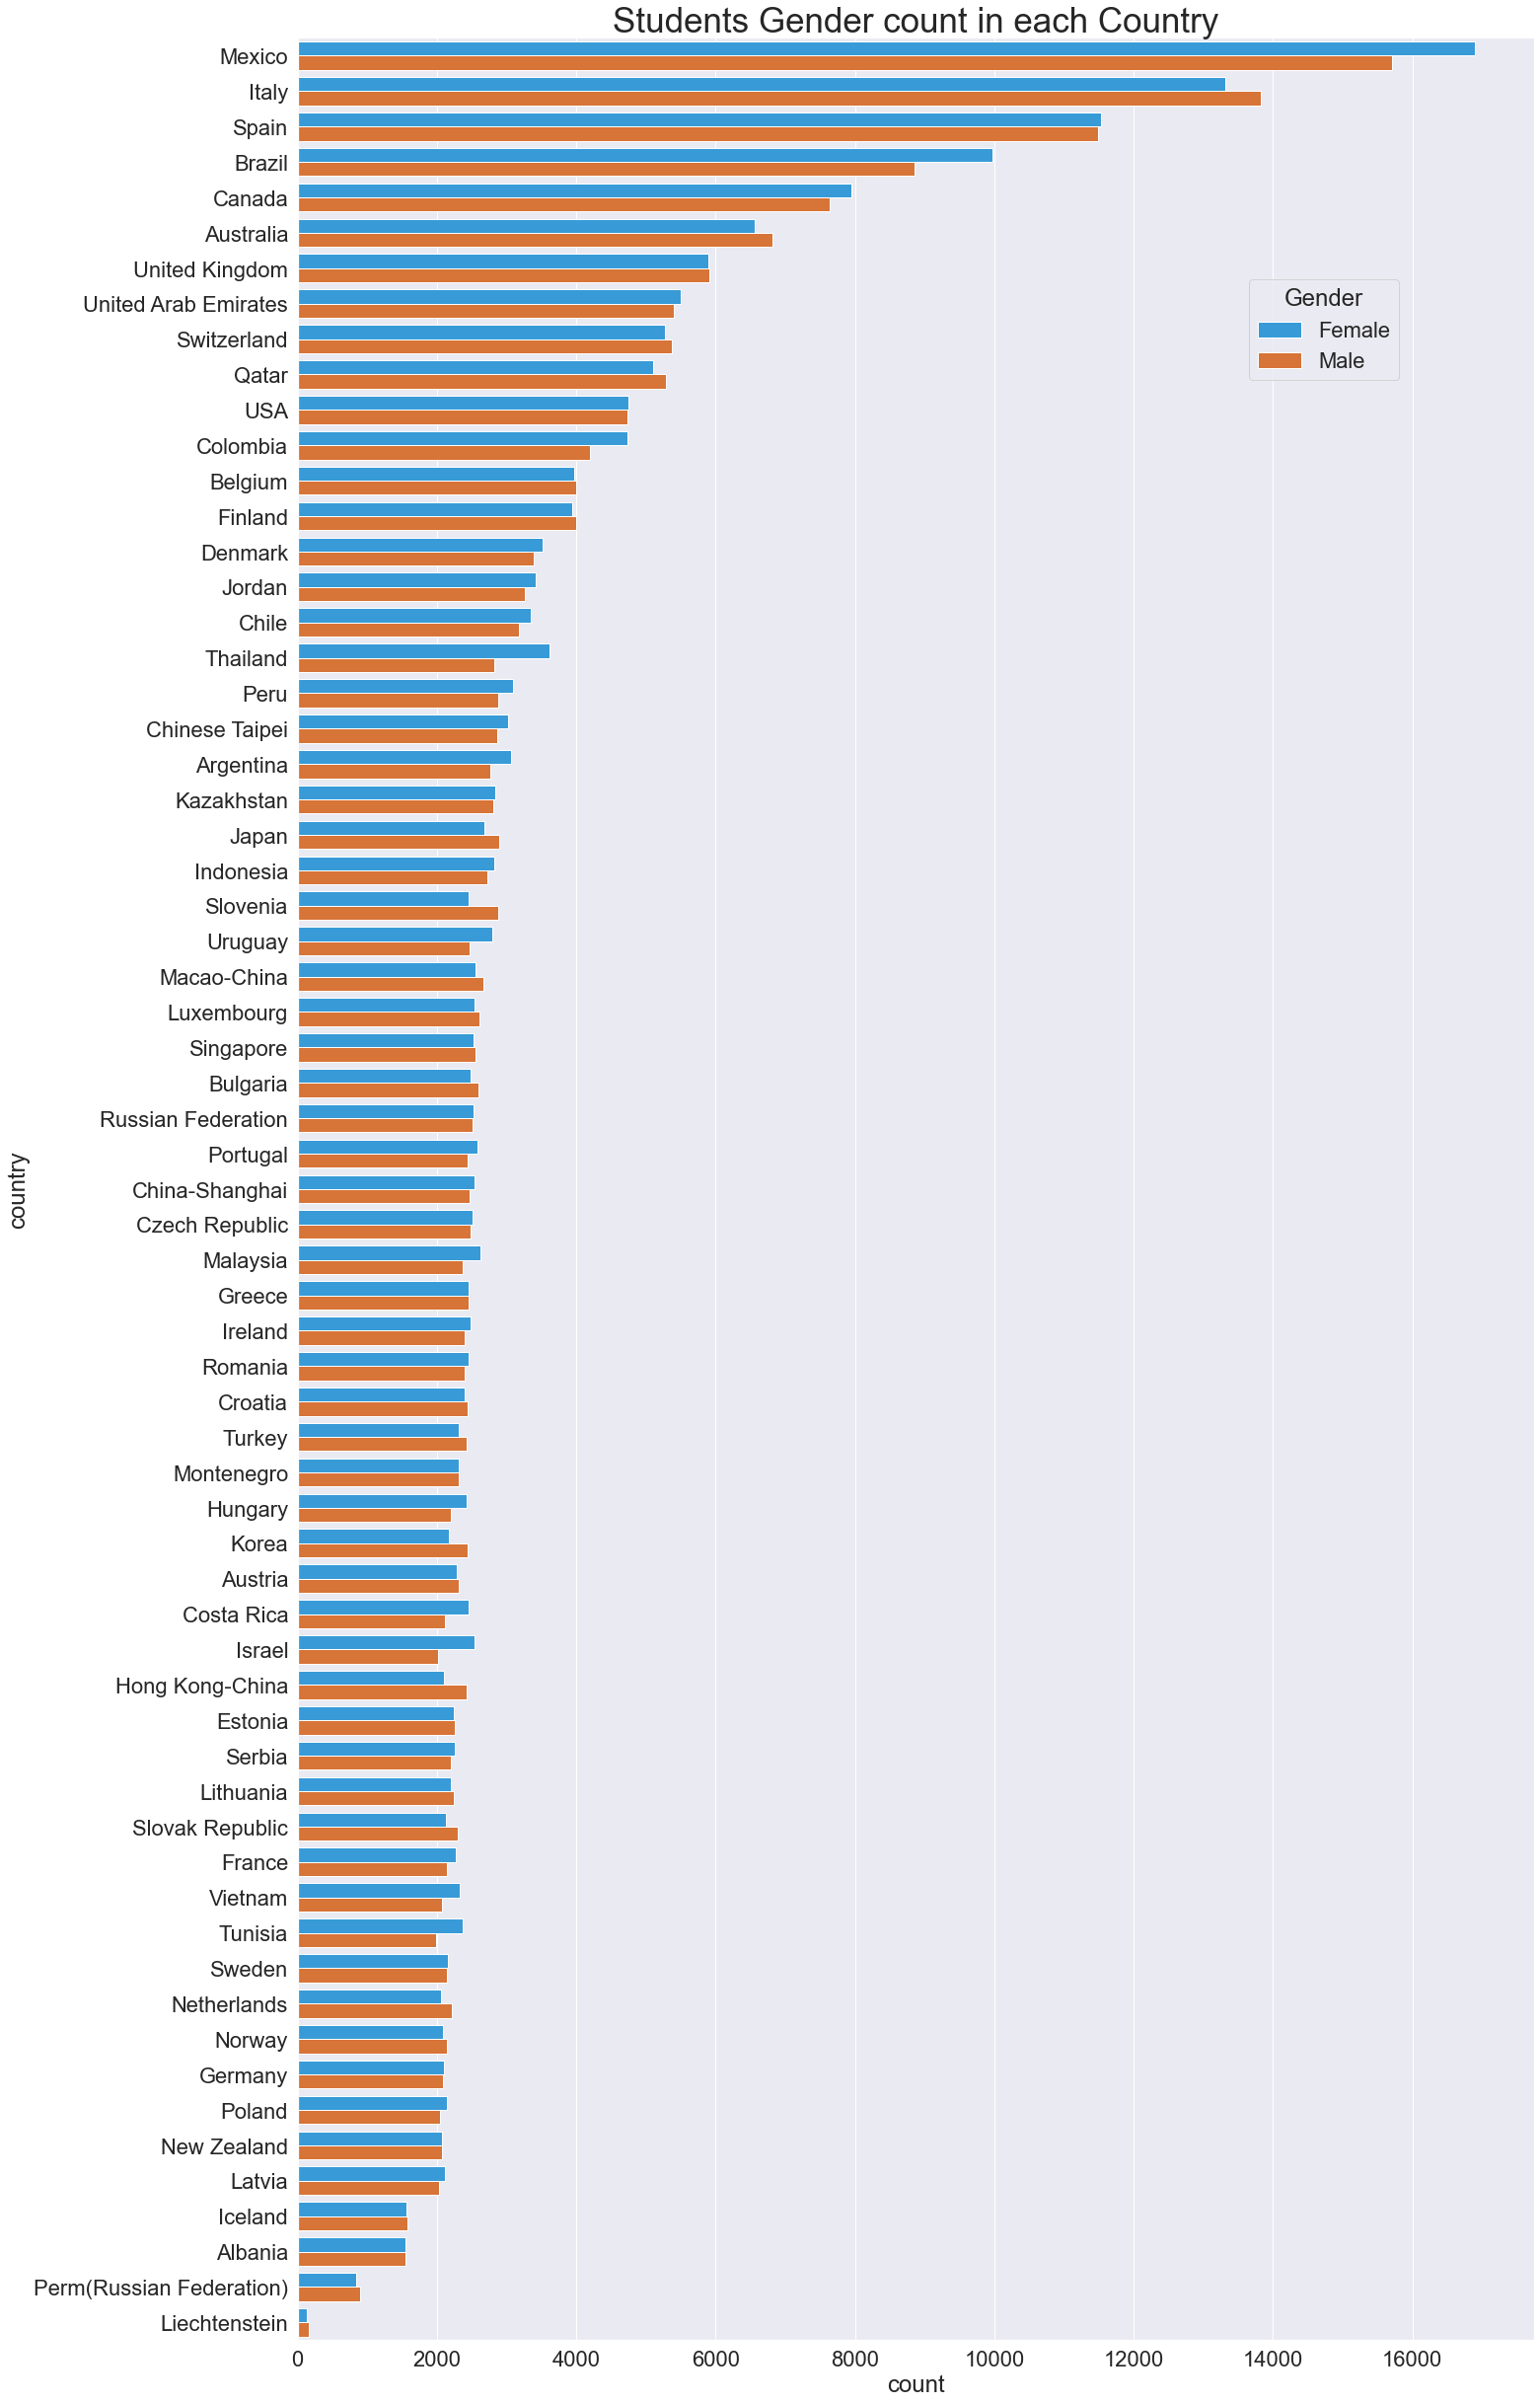

In [27]:
# Gender Student count by Each Country

plt.figure(figsize=[20,40])
sb.set(font_scale = 2)

order= df['country'].value_counts().index
sb.countplot(data=df,y='country',order=order,hue='gender',palette = colors  )

plt.title('Students Gender count in each Country',size=35);
plt.legend( title = 'Gender', bbox_to_anchor=(.9, .9));

#### for the most, gender are in an equal count, yet south American countries female count seems much higher than males

## Grade vs Wealth Regression  
<a id="gwr"></a>
#### how much can wealth have and Impact on grades  

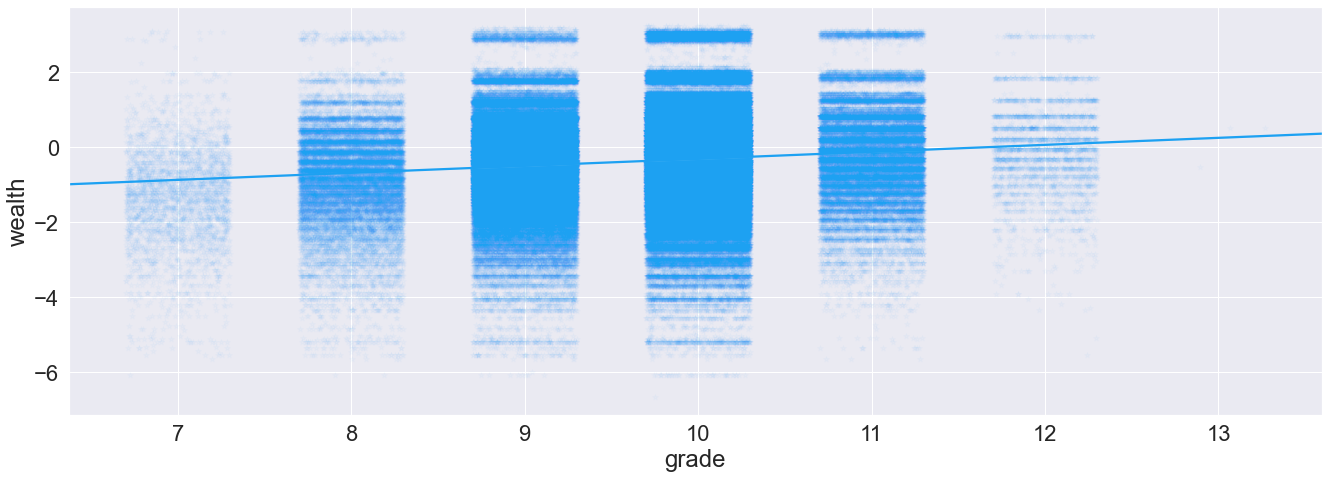

In [28]:
# regression plot between grade and wealth 

plt.figure (figsize = [20,7])
sb.set(font_scale = 2)
sb.regplot(y= 'wealth', x='grade', data = df,marker = '*', color ='#1DA1F2' ,
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/40});

#### there is a slight and almost neglectable positive regssion between the two, stating that wealth doesnt have a big impact on grades. most grades fall in 9-10 

## Wealth vs Socio-Economic Regression 
<a id="wser"></a>
#### is there any correlation between Wealth and Socio-Economic status? how significant is it 

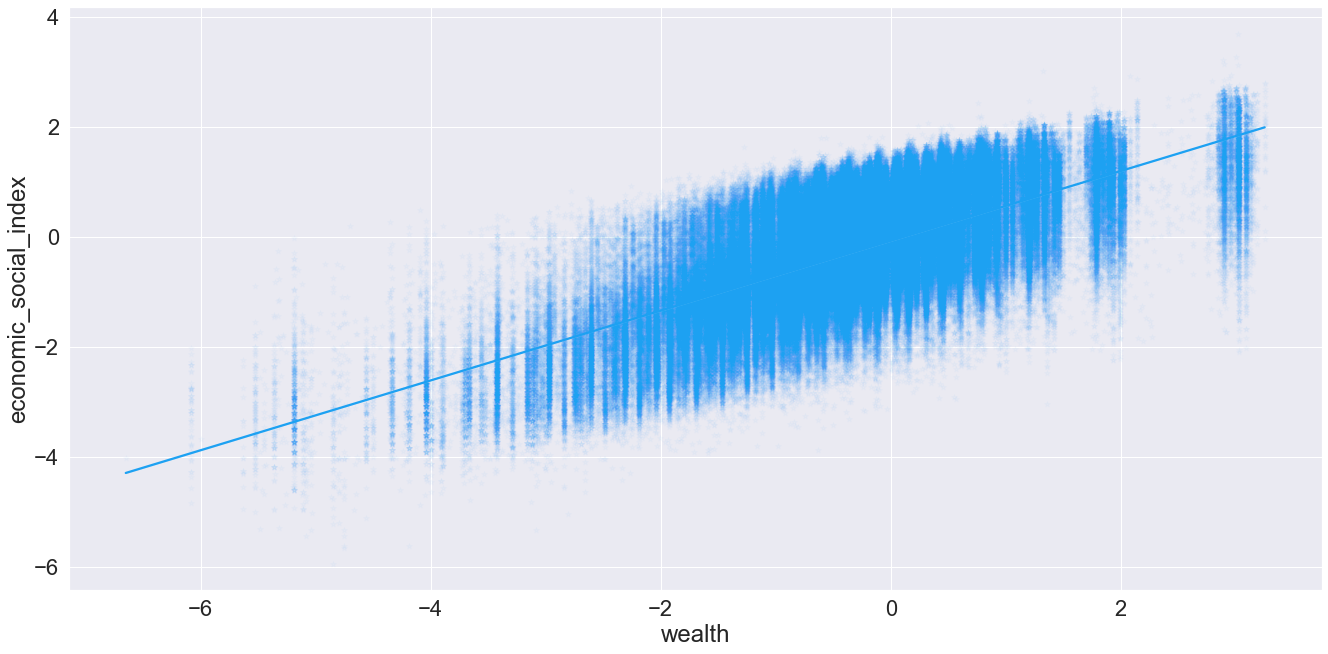

In [29]:
# regression plot between wealth and economic soacial index 
plt.figure (figsize = [20,10])
sb.set(font_scale = 2)
sb.regplot(x= 'wealth', y='economic_social_index', data = df,marker = '*', color ='#1DA1F2', scatter_kws={'alpha':1/40} );

#### as expected, there is a pretty strong positive correlation between the two, can it also mean that Socio-Economic staus have little if any impact on grades ? 

## Wealth Socio-Economic Grade Correlation 
<a id="wsegc"></a>
### lets double check our fiding from prevoious plots and plot a heatmap of all 3 features

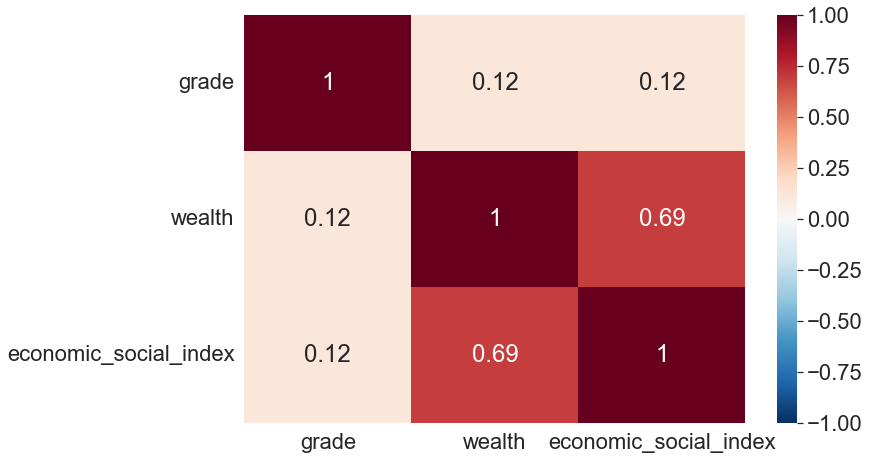

In [30]:
# heatmap correlation between grade, wealth and economical social index 

plt.figure(figsize = [10,7])
sb.set(font_scale = 2)
chart = sb.heatmap(data=df[['grade','wealth','economic_social_index']].corr(),
           center=0, cmap='RdBu_r',annot=True, vmin= -1, vmax=1)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0 );

#### now it becomes clear, we can say that wealth and Socio-Economic status are not a factor on  a grade, lets dig deeper into the data to check what can affect the grades 

## Matrixes 
<a id="mat"></a>
#### a set of observations focusing on the parents work status, educadtion level and the effects, if any, on the grade, then observe the  parents status  and diffrencense in OECD and Non OECD countries.

In [31]:
#creating a face_grid function 
'''
face_grit will create 2 Facegrids f/m
maping each grid with col1 or col2 
to create a histogram with bcol as the X axis, 
finally ylim will set the plots y axis min and max values

'''
# defining face_grid function
def facet_grid (col1,bcol,ylim, colors):
    sb.set(font_scale = 1)
    f = sb.FacetGrid(data = df, col = col1 )
    f.set(ylim=(0, ylim ))
    f.map(plt.hist, bcol , bins = 6,color = colors )
    f.axes[0,0].set_ylabel('Student count')

### Parents work stats vs Grade
<a id="pwsg"></a>
#### parents work status effect on grades 

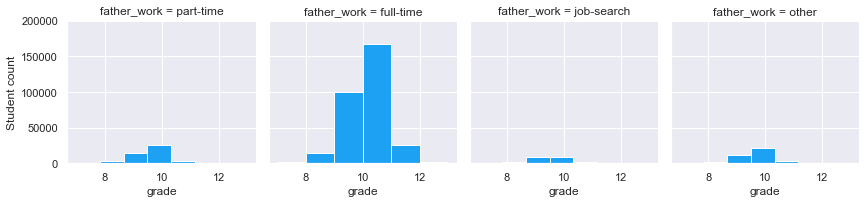

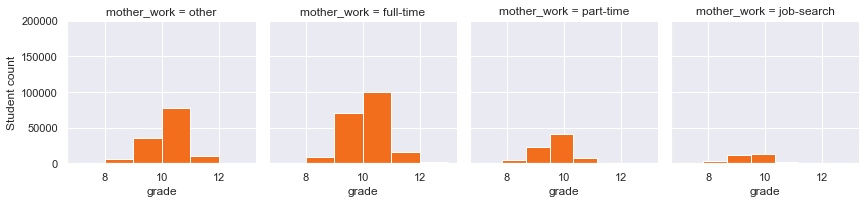

In [32]:
# comparing fathers and mothers work stats vs grade
# appling the function as statedd above
colors = ['#1DA1F2','#f26e1d']
facet_grid('father_work','grade',200000,colors[0])
facet_grid('mother_work','grade',200000,colors[1])

**seems clear the full time working father and mother have a big impact on the student grade, there are more full time working fathers and grades worsen drasticlly for not full time  work for father! 
mother work stats are more diverse and in comparison to father, the work stats has less effect on grades outcome, nevertheless mother work in (other , full time) stil have a better grade.** <br>

**in short, best grades come from full time working Dads, other or full time working Moms**

### Parents School Education vs Grade
<a id="pseg"></a>
#### parents Education level per grade

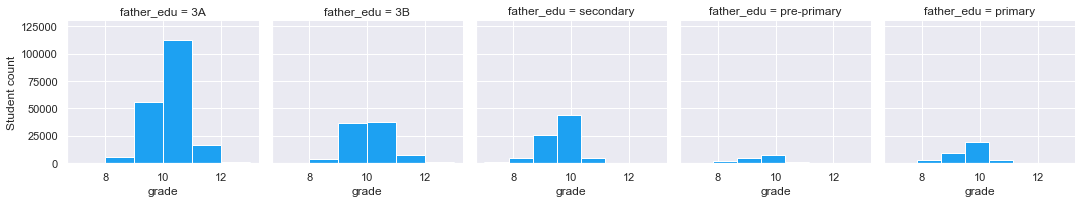

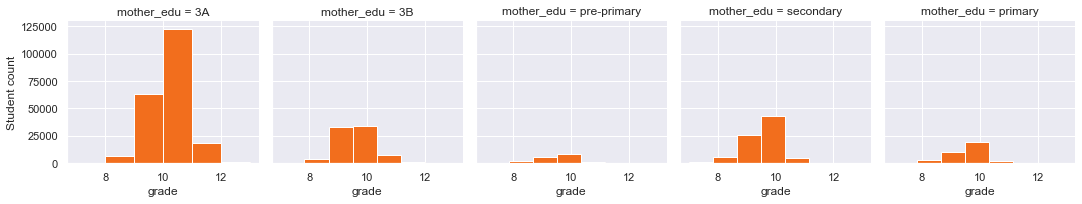

In [33]:
# appling education columns, grade to the funciton 

facet_grid('father_edu','grade',130000,colors[0])
facet_grid('mother_edu','grade',130000,colors[1])

**as expected, the higher the education level of the parents the better grades students have, 2 observation are  intresting**<br>
**1 - 3A educated mothers have higher count of good grade students!** <br>
**2- surpisingly secondary education parents slighly outpreform 3B educated parents wich are in a higher education class!** <br>

**which let us conclude that best grades come from, 3A educated parents by far, followed by Secondary educated.**

### Parents work stats vs OECD 
<a id="pwso"></a>
####  let see how parent work stat are devided in and oput OECD Countries

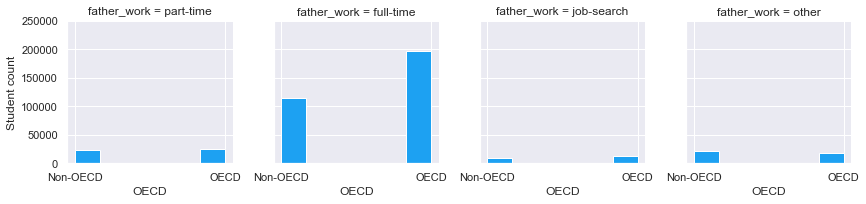

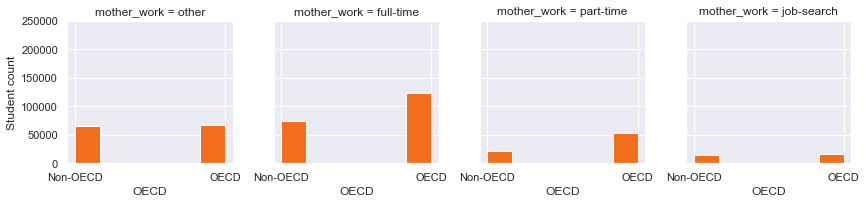

In [34]:
#caling function to compare parents work in/out OECD countries1
facet_grid('father_work',"OECD",250000,colors[0])
facet_grid('mother_work',"OECD",250000,colors[1])



**OECD countries have a significantly higher count of full time working parents,they are the bigger part after all which make sense, comparing it to the previous parents work/grade plot results, we would assume that OECD countries will have a slight higher grade count** 

## Parents Education stats vs OECD 
<a id="peso"></a>
#### how schooling rates differn between OECD and None OECD countries

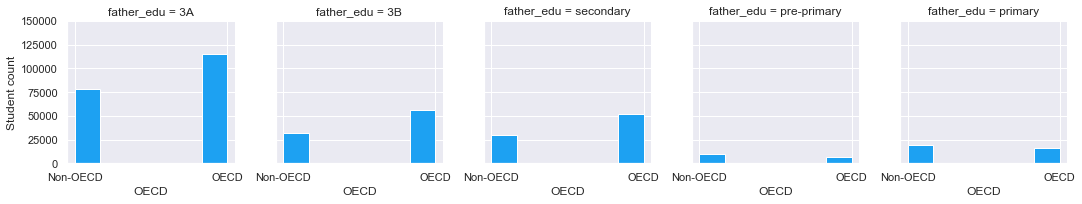

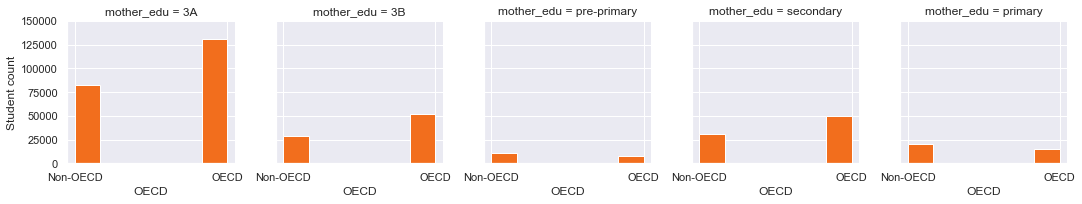

In [35]:
# calling facegrit function on parents and OECD with y limiter  
facet_grid('father_edu',"OECD",150000,colors[0])
facet_grid('mother_edu',"OECD",150000,colors[1])


**considering that country type (OECD or Non OECD) are 60% vs 40%, both seems in the same ration in term of school education, even between parents**

## Grade Distribution in OECD/Non OECD Countries 
<a id="gdo"></a>
#### diffrences in grade distribution between thse 2 types of countries 

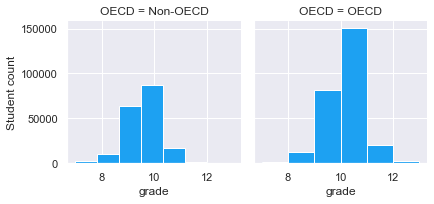

In [36]:
# OECD vs Grade count histogram plot 
oecd = sb.FacetGrid(data = df, col = 'OECD')
oecd.map(plt.hist, 'grade' ,bins = 6, color = '#1DA1F2');
oecd.axes[0,0].set_ylabel('Student count');

**naturally following the pre observed stats above, OECD countries have a higher grade rate as Non OECD** 

## Grade Average and Max in OECD/Non OECD 
<a id="gamo"></a>
#### lets see simple stats in OECD vs Non countries relating to Average and Max grades

Text(0, 0.5, 'Max grade')

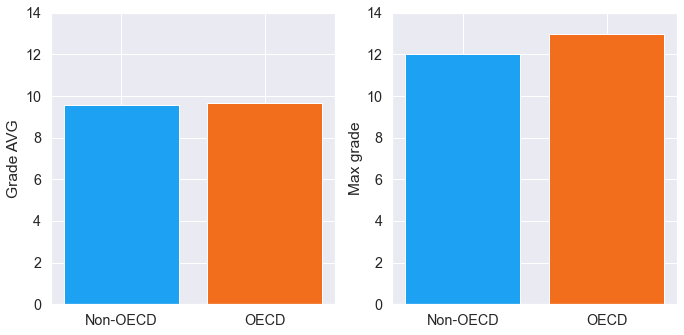

In [37]:
#aveage and max grades between OECD and Non OECD countries 
sb.set(font_scale = 1.3)
plt.figure(figsize = [10,5])
colors = ['#1DA1F2','#f26e1d']

#left plot average grade 
plt.subplot(1,2,1)
o = df.groupby('OECD')['grade'].mean()
plt.bar( o.index , o.values , color = colors)
plt.ylim(0 ,14)
plt.ylabel('Grade AVG')

#right plot max grade 
plt.subplot(1,2,2)
o = df.groupby('OECD')['grade'].max()
plt.bar( o.index , o.values , color = colors )
plt.ylim(0 ,14)
plt.ylabel('Max grade')

**grade distribution is almost similar bettwen OECD and None OECD countries, grade range is between 7-12 for both, with OECD fortunate to have 3 geniuses with a Max grade of 13!**

## Full Heatmap Demo
<a id="fhmd"></a>
#### lets go wild for a bit, making a demo dataframe ,turn all qualtitive into quantitive and find correllations using a heatmap1

In [38]:
'''
creating a demo dataframe 'df2'
turning all qualtitive into quantitive 
each exact change is mentioned above each line of code 
'''

# create a new dataframe copy, named df2 
df2 = df.copy()

# sorting parents education from 1-5 as 5 is highest schooling  
df2['father_edu'] = df['father_edu'].replace({'3A':5, '3B':4,'secondary':3,'primary':2,'pre-primary':1}) 
df2['mother_edu'] = df['mother_edu'].replace({'3A':5, '3B':4,'secondary':3,'primary':2,'pre-primary':1}) 


# sorting parents work from 1-4 as 4 is full time worker   
df2['father_work'] = df2['father_work'].replace({ 'full-time' : 4, 'part-time':3,'other':2, 'job-search':1})
df2['mother_work'] = df2['mother_work'].replace({ 'full-time' : 4, 'part-time':3,'other':2, 'job-search':1})

# Turning OECD into 1 and Non OECD into 0 
df2['OECD'] = df2['OECD'].replace({'OECD': 1 , 'Non-OECD':0})

# turning male into 1 female into 0 
df2['gender'] = df2['gender'].replace({'Male': 1 , 'Female':0})

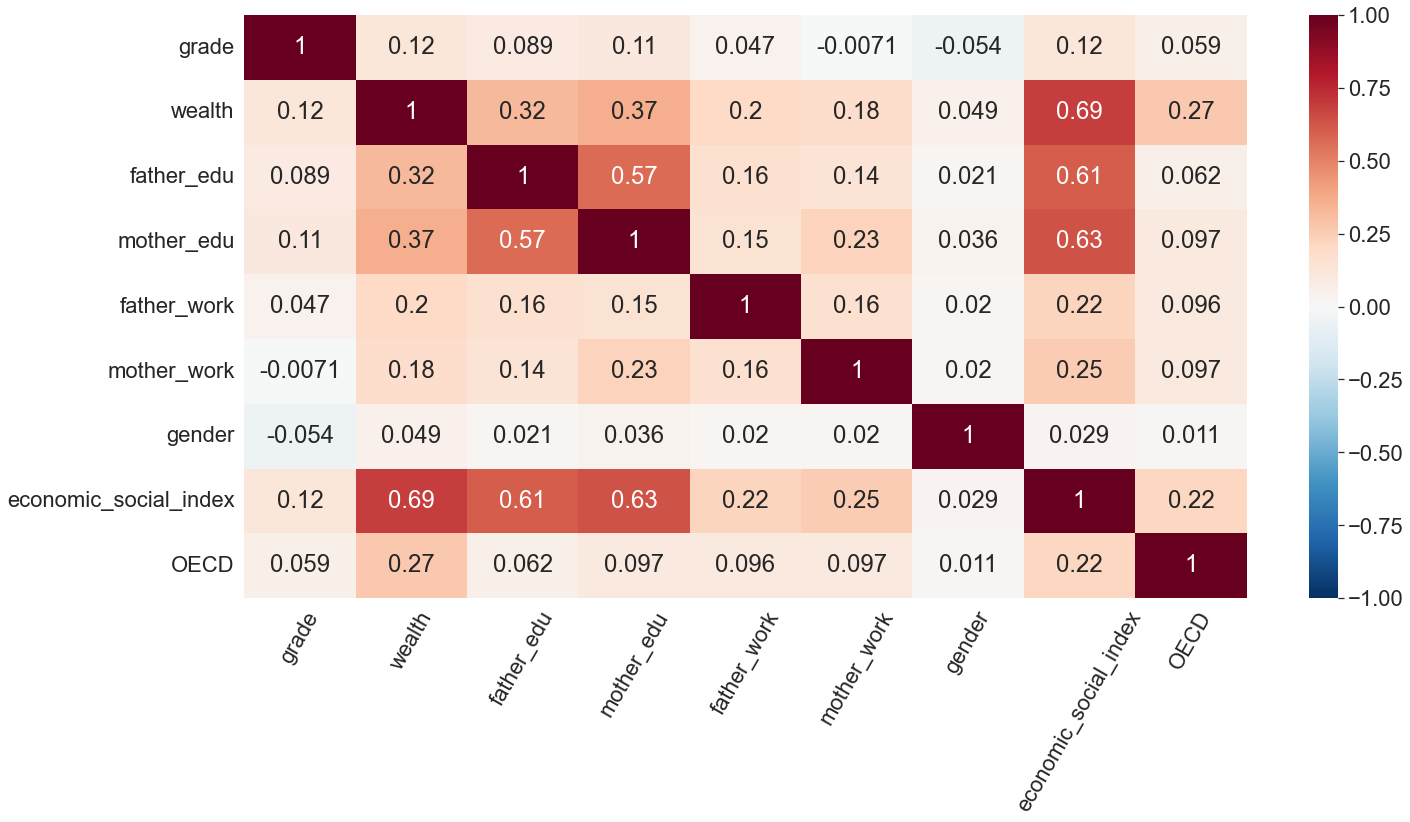

In [39]:
'''
plotting a heat map using all the columns the were 
changed in the previos block
'''

# plotting a heatmap for bnoth parents education, along with wealth, grade, and Socio Economimc index 
plt.figure(figsize = [20,10])
sb.set(font_scale = 2)
chart = sb.heatmap(data=df2[['grade','wealth','father_edu','mother_edu','father_work','mother_work','gender','economic_social_index','OECD']].corr(),
           center=0, cmap='RdBu_r',annot=True, vmin= -1, vmax=1, )
chart.set_yticklabels(chart.get_yticklabels(), rotation=0 );
chart.set_xticklabels(chart.get_xticklabels(), rotation=60 );



**going all in on a ful heat map shows some intresting results, some we already expected, some not yet this plot make it clear how all the data is correlated.**

**althoug wealth and economic index are pretty correlated, wealth and parents school education and not, yet socia economic index is! another correlation observed  is betweenm fathers and mothers education**

**to cuncoled here, we didint find any parameter that can suggest to have an clear impact on the Grade**  


# Bivariante Summary 
<a id="bs"></a>
>the puzzle is starting to add up, Regssion  and heat maps plots showed us how our data is corralated, we came to see that 
the Socio-Economic and wealth index are highly correlated yet, and quite surprisingly, they are not with the Grades! 
OECD got the top brilliant students, and generally students on the higher end of grades. 
parents working and school education stats didnt have much effect to the outcome of a grade. 





## Multivariate Exploration
<a id="me"></a>
### visualizations of 3 variates and more .

## Grades Gaussian Density Per Country 
<a id="ggdpc"></a>
**observing the grade density distribution in each country with croos lines on the 30%(maroon) and 75%(black) respectively**

C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.


C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\jack_\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

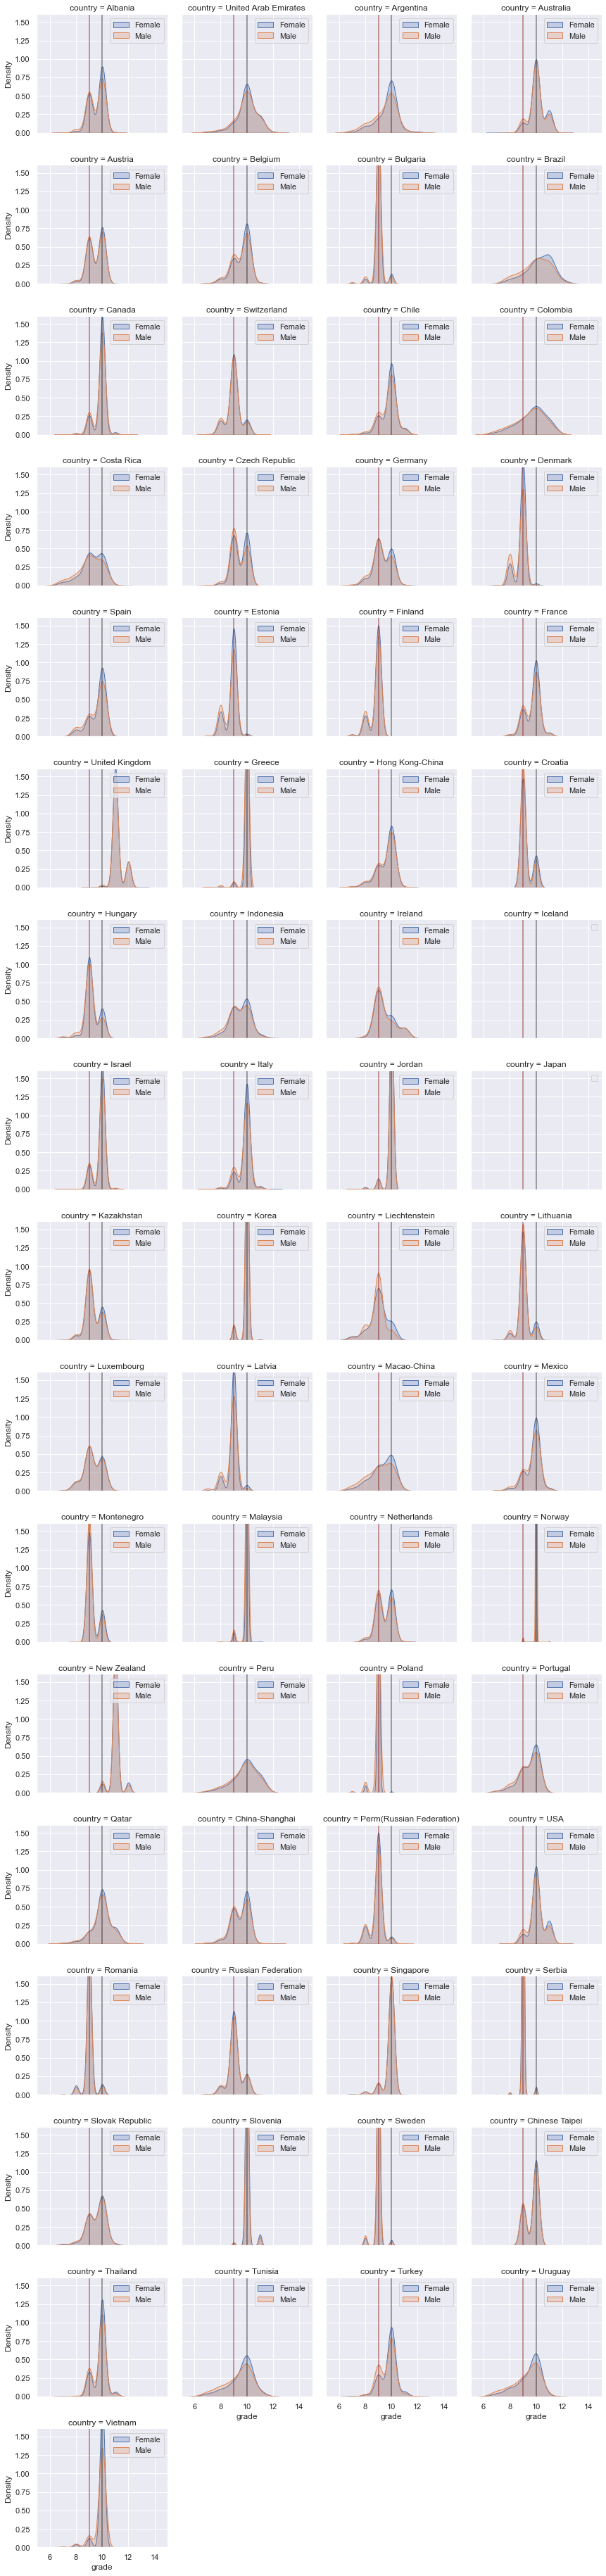

In [40]:
# plotting Gaussian density distribution of grades in each country, with lines on the 30% and 75% 
sb.set(font_scale = 1)
g=sb.FacetGrid(data=df, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'grade', bw=0.5 ,shade = True  )

#looping on each country 
for ax, c in zip(g.axes.flat, df.country):
    sb.set(font_scale = 1)
    ax.axvline(x=df.query('country==@c').grade.quantile(0.3), color='maroon', alpha=.5)
    ax.axvline(x=df.query('country==@c').grade.quantile(0.75), color='black', alpha=.5)
    ax.legend()
    plt.ylim(0 ,1.6)
    plt.xlim(5,15)
    

**NOTICE : Japan and Iceland have only '10s' as grade**

 we can see the diffrent density distribution in each country, with the 30% and 75% grade lines as guides to see which are doing better or worse, we can devide some as such  :

**countries  which Density is on the higher 75%:** Ausralia, USA, UK, Newzeland - **ALL are English speaking countries!**

**countries which Density is strongly on 75%:** Slovenia , Malaysia, Norway, Jordan

**countries which Density is on the lower 30%:** Serbia, Sweeden, Poland( with a female Extreme Density!), Bulgaria - **all are European countires!**

## Wealth vs Grade in OECD/ Non OECD Countries
<a id="wgon"></a>
#### what is each student wealth stats in relation to his grade in OECD and Non OECD Countries 

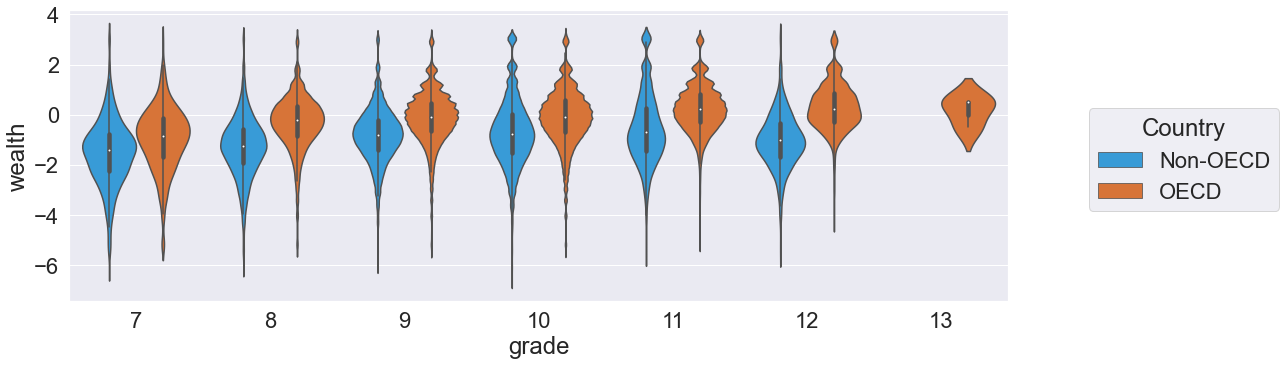

In [41]:
# Grade and wealth violin plot in OECD and Non-OECD countries

plt.figure(figsize=[15,5])
sb.set(font_scale = 2)
ax = sb.violinplot(x="grade", y="wealth", hue="OECD",
                    data=df, inner = 'box' , palette=['#1DA1F2','#f26e1d'])
ax.legend( title = 'Country', bbox_to_anchor=(1.3,0.7));

a fast observation shows us the Geniusses we observere in previous plots, in addition that they fall on the higher end of Wealth index scale.

wealth varies alot in Non-OECD countries for each given grade,where OECD countries are a bit more condense.
as we get higher in grades, countries have a slightly higher wealth index, thus very low correlated but still,excluding grade 12,where NonOECD countries have a lower wealth index for a significat high grade!
this plots shows us that OECD countries are wealthier and have a higher chance to get high grades. 


## Gender wealth gap per Grade
<a id="gwgpg"></a>
#### how the wealth index varies between genders per Grade ? 

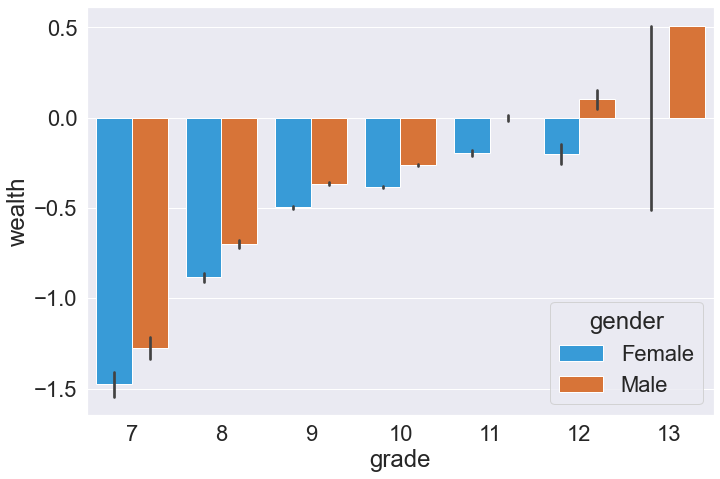

In [42]:
#plotting gender wealth and grades 

plt.figure(figsize = [10, 7])
sb.set(font_scale = 2)
sb.barplot(data=df, x='grade', y='wealth', hue= 'gender', palette = ['#1DA1F2','#f26e1d']);


**we saw earlier that Males have a better wealth index vs Females, he we see its the case in every givin grade with an extreme change towards the highest 2 grades!**

## Multivariate Summary 
<a id="ms"></a>
> the Gaussian plot showed us in depth grade for each country, where we summrised that top countries came out to be English speaking countries! 
the Male and Female Wealth gap gets bigger the higher the score, with males having the top highest scores, OECD countries seems to have a slight advantage over Non OECD, its a slight yet not neglectable advantage, for the long the run it might get bigger 

# Conclusions
<a id="con"></a>
### some key points that were noted along the whole Project 

in term of wealth and Socio Economic stats, and even withParental school Education and Work stats, we coudn't find a clear factor that had a clear effect on the Grade, also for OECD or Non OECD countries. 
thus said, OECD countries having a slight advantage in almost every Parameter we observed, which all combined are giving those countries Students an advantage to get better grades or at least an overal grade.
best countries that got the top overall Grade were Englisch speaking countries! including USA, Uk, New Zeland and Australia
while on the lowest scale came out European countires including Serbia, Sweeden, Poland,and Bulgaria.

Although both genders count is almost equal, there is a clear total wealth gap in favor of Males! we can study this case closer, cause we also observed that south American countires have a considerable higher females students rate,and Mexico( counting it as a south American Latin countires) tops the chart with students count.

the OECD countries were also on the the upper side on grades and Some Guinesses, 3 to be exact, 2 females and 1 male were from the OECD countries(New Zeland & Uk) and they also came to be from the wealthiest students.

when we were observing the parents school education, which didnt play a rule in determining a student grade, and while the Socio-Economic and wealth indexes had a decent correlation around 70%  between each other, only the Socio-Economic index had another impact and correlation, again 70% on the Parents School Education level! 
OECD students seems to be closer to each other in wealth index terms, were in Non OECD wealth index varies alot for each student per Grade. 




